Entregable 2 Supervised Machine Learning

El objetivo de este ejercicio es estimar la probabilidad de que una máquina con Sistema Operativo Windows se vea infectada por algún tipo de malware, en base a las distintas propiedades de la máquina.

Se han obtenido muestreando el dataset original de la competición de Kaggle Microsoft Malware Prediction, y se basan en las características obtenidas en la solución de endpoint Windows Defender. Cada fila del dataset corresponde a una máquina única, identificada por el campo MachineIdentifier. El target es la variable HasDetections, que indica que se ha detectado Malware en la máquina.

Se solicita:
1. Desarrollar el ML Canvas para este problema, suponiendo que nuestro modelo se usará para implementarlo en la aplicación Windows Defender dando aviso al usuario cuando su máquina supere un cierto umbral de probabilidad de ser infectada.
2. Desarrollar un Notebook con nuestra propuesta de modelo para resolver el problema. El Notebook debe contener todas las etapas de la ML Checklist debidamente comentadas (se valorará la claridad), y ejecutar sin problemas para obtener el modelo resultado. En concreto, debe realizarse la exploración de datos (se valorará el desarrollo de visualizaciones interesantes), el preprocesamiento, el modelado mediante un Decision Tree (opcionalmente, explorar otros algoritmos) y la evaluación.

¿En qué debo centrar mis esfuerzos para conseguir un buen proyecto?

Corrección
*   Detectar la tarea correctamente
*   Uso adecuado de algoritmo / algoritmos
*   Transformación de variables distintas
*   Partición correcta del dataset
*   Conclusiones acuradas
*   Métricas de evaluación adecuadas


Automatización
*   Eficiencia del código: evitar for loops si es posible
*   Uso de funciones en Python

Explicabilidad
*   Visualizaciones chulas
*   Plots variados
*   Razonamiento de negocio
*   Diferentes formas de explicar el resultado del modelo

In [10]:
import pandas as pd  # Librería para la manipulación y el análisis de datos
# Librería para la manipulación de datos y para la ejecución de operaciones matemáticas
import numpy as np
import matplotlib.pyplot as plt  # Librería para la visualización de datos
import seaborn as sns  # Librería para la visualización de datos
# Librería para crear modelos de ML
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pd.set_option("display.max_columns", None)

In [11]:
# LEEMOS EL FICHERO
df = pd.read_csv("sample_mmp.csv", low_memory=False)

**EDA**

In [12]:
df.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,8,85219.0,NaN,205.0,172,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,1443.0,275891.0,4.0,5.0,2273.0,NaN,953869.0,HDD,952838.0,0.0,8192.0,AllinOne,23.0,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Professional,PROFESSIONAL,UUPUpgrade,27.0,120.0,FullAuto,0.0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,355.0,19951.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,11.0,1.0
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,129,54198.0,NaN,126.0,124,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2102.0,248850.0,4.0,5.0,2660.0,NaN,476940.0,HDD,457600.0,0.0,8192.0,Notebook,13.2,1280.0,720.0,Mobile,lion,0.000000e+00,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Professional,PROFESSIONAL,UUPUpgrade,18.0,72.0,FullAuto,0.0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,0.0,486.0,48753.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,46781.0,2.0,1.0,1,149,122689.0,27.0,181.0,56,windows10,x64,10.0.0.0,10586,768,th2,10586.1176.amd64fre.th2_release_sec.170913-1848,Home,1.0,0,NaN,0.0,74.0,RequireAdmin,1.0,1.0,Convertible,Windows.Desktop,2206.0,238234.0,4.0,5.0,2998.0,NaN,244198.0,SSD,221251.0,0.0,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,lion,0.000000e+00,10.0.10586.1176,amd64,th2_release_sec,10586.0,1176.0,Core,CORE,Update,24.0,109.0,Notify,0.0,IS_GENUINE,Retail,NaN,0.0,Retail,0.0,554.0,33111.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,15.0,0.0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,164,114587.0,27.0,205.0,172,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,525.0,265410.0,8.0,5.0,2880.0,NaN,228936.0,S

In [13]:
df.describe()

,Unnamed: 0,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,3.077120e+05,307712.0,306609.000000,307712.000000,14672.000000,306528.000000,306528.000000,306528.000000,307712.000000,307712.000000,296447.000000,212701.000000,307704.000000,307712.000000,307712.000000,307712.000000,306536.000000,307712.000000,289445.000000,305731.000000,304530.000000,307311.000000,304408.000000,304181.000000,306292.000000,306292.000000,306291.000000,3.058980e+05,3.058970e+05,307711.000000,304948.000000,306072.000000,306075.000000,306075.000000,2.984780e+05,307711.000000,307711.000000,305648.000000,307711.000000,307711.000000,52240.000000,302302.000000,112087.000000,301451.000000,302235.00000,307711.000000,112355.0,307151.000000,307711.000000,307711.000000,305229.000000,297270.000000,297270.000000,307711.000000
mean,4.459124e+06,0.0,6.845272,0.017487,1650.704062,47864.136542,1.326463,1.020882,0.987713,108.055142,81249.709442,24.865779,169.738320,122.671053,15726.699579,574.469813,0.945762,0.000032,0.000453,126.621157,0.978354,0.994885,2219.218894,239310.863933,3.993389,4.527608,2370.969389,5.142965e+05,3.783751e+05,0.077186,6126.682336,16.696953,1548.070061,898.284764,1.128746e+09,15842.768803,969.046063,14.611164,60.476655,0.000533,0.000019,0.000020,0.000196,402.128223,33024.75746,0.485189,0.0,0.006935,0.125956,0.038045,0.057481,0.285343,7.891183,0.500788
std,2.573836e+06,0.0,1.027010,0.131078,1006.326898,14012.793953,0.523632,0.167513,0.110166,63.133367,48977.125306,5.610953,89.382749,69.311991,2189.049775,248.267931,0.226488,0.005701,0.021269,42.583266,0.145527,0.221681,1316.181382,71946.022743,2.088473,1.291220,843.258267,3.784579e+05,3.475262e+05,0.266887,5011.710192,5.956686,368.033217,214.930958,1.890468e+09,1957.387504,2925.248114,10.209839,45.042429,0.023080,0.004375,0.004455,0.014009,221.493407,21216.51857,0.499781,0.0,0.082986,0.331800,0.191306,0.232761,0.451579,4.551568,0.500000
min,2.800000e+01,0.0,0.000000,0.000000,1.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,1.000000,7600.000000,16.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,74.000000,22.000000,1.000000,1.000000,19.000000,2.980000e+02,9.689000e+03,0.000000,512.000000,4.900000,-1.000000,-1.000000,0.000000e+00,9600.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,11.000000,23.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.229138e+06,0.0,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36825.000000,18.000000,89.000000,74.000000,15063.000000,256.000000,1.000000,0.000000,0.000000,111.000000,1.000000,1.000000,1443.000000,189739.000000,2.000000,5.000000,1998.000000,2.384750e+05,1.207750e+05,0.000000,4096.000000,13.900000,1366.000000,768.000000,0.0

In [14]:
df.shape

(307712, 84)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307712 entries, 0 to 307711
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         307712 non-null  int64  
 1   MachineIdentifier                                  307712 non-null  object 
 2   ProductName                                        307712 non-null  object 
 3   EngineVersion                                      307712 non-null  object 
 4   AppVersion                                         307712 non-null  object 
 5   AvSigVersion                                       307712 non-null  object 
 6   IsBeta                                             307712 non-null  int64  
 7   RtpStateBitfield                                   306609 non-null  float64
 8   IsSxsPassiveMode                                   307712 non-null  int64 

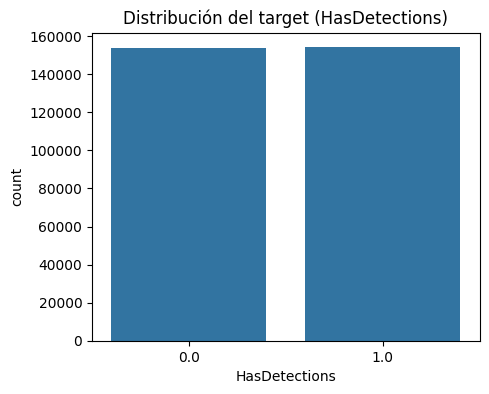

HasDetections
1.0    0.500788
0.0    0.499212
Name: proportion, dtype: float64


In [16]:
# vista general del target
plt.figure(figsize=(5,4))
sns.countplot(x=df['HasDetections'])
plt.title("Distribución del target (HasDetections)")
plt.show()

print(df['HasDetections'].value_counts(normalize=True))

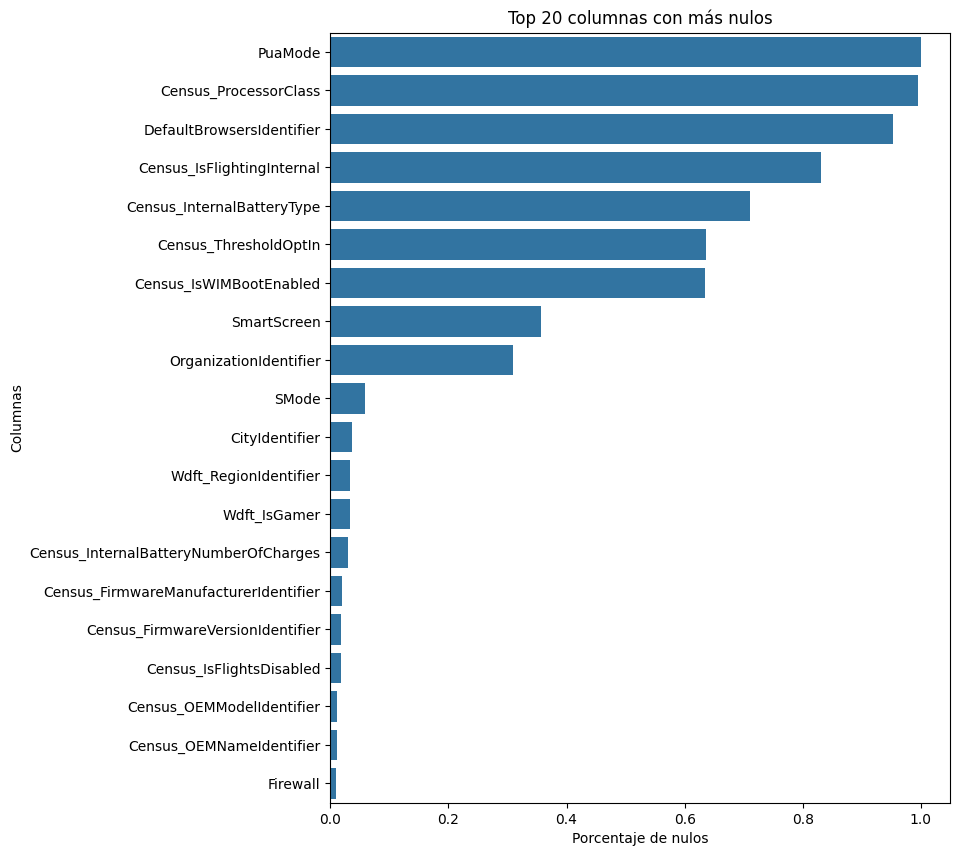

In [17]:
#nulos
null_pct = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(y=null_pct.index[:20], x=null_pct.values[:20])
plt.title("Top 20 columnas con más nulos")
plt.xlabel("Porcentaje de nulos")
plt.ylabel("Columnas")
plt.show()


In [18]:
def obtener_lista_variables(dataset, target):

    lista_numericas = []
    lista_boolean = []
    lista_categoricas = []

    for i in dataset:
        if (dataset[i].dtype.kind == "f" or dataset[i].dtype.kind == "i") and len(dataset[i].unique()) != 2 and (i not in target):
            lista_numericas.append(i)
        elif (dataset[i].dtype.kind == "f" or dataset[i].dtype.kind == "i") and len(dataset[i].unique()) == 2 and (i not in target):
            lista_boolean.append(i)
        elif (dataset[i].dtype.kind == "O") and i not in target:
            lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [19]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(
    df, target)

In [20]:
print("numericas " , len(lista_numericas))
print("boleanas ", len(lista_boolean))
print("categorias ", len(lista_categoricas))

numericas  49
boleanas  4
categorias  30


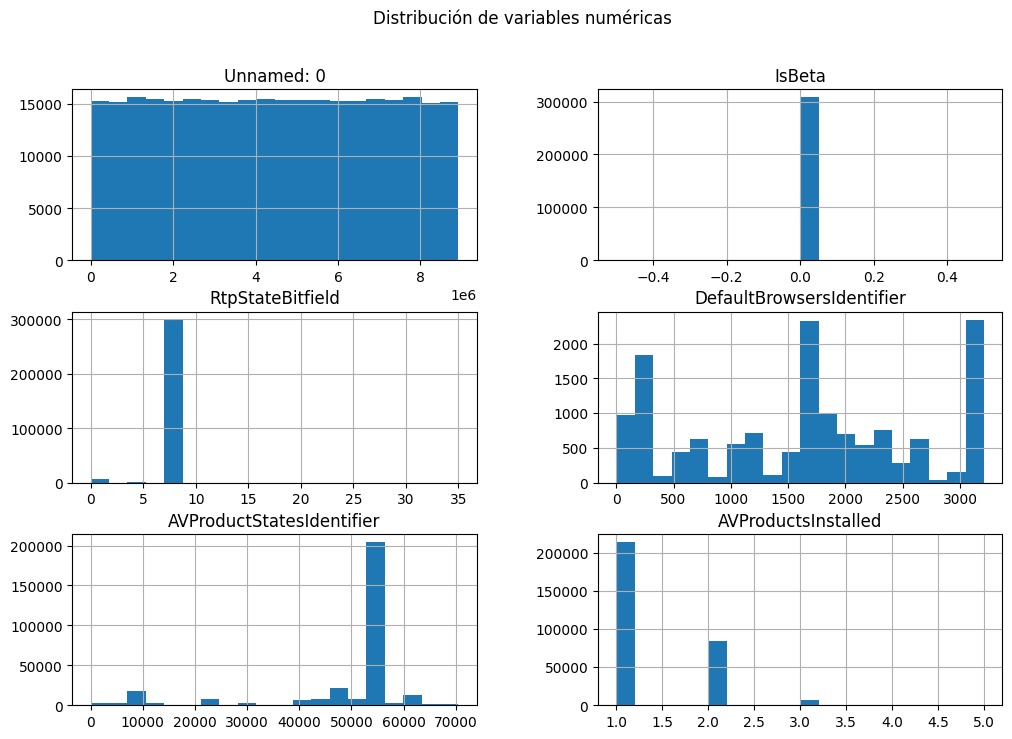

In [21]:
# variables numericas visuales

numericas = lista_numericas[:6]  # Para no explotar visualmente
df[numericas].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribución de variables numéricas")
plt.show()

In [22]:
categorias_mayor_10 = []
categorias_menor_10 = []
for i in lista_categoricas:
  if len(df[i].unique()) >= 10:
    categorias_mayor_10.append(i)
  else:
    categorias_menor_10.append(i)

  print(i, " : ", len(df[i].unique()))


MachineIdentifier  :  307712
ProductName  :  2
EngineVersion  :  48
AppVersion  :  94
AvSigVersion  :  5677
Platform  :  4
Processor  :  3
OsVer  :  18
OsPlatformSubRelease  :  9
OsBuildLab  :  432
SkuEdition  :  8
PuaMode  :  2
SmartScreen  :  13
Census_MDC2FormFactor  :  12
Census_DeviceFamily  :  3
Census_ProcessorClass  :  4
Census_PrimaryDiskTypeName  :  5
Census_ChassisTypeName  :  34
Census_PowerPlatformRoleName  :  10
Census_InternalBatteryType  :  26
Census_OSVersion  :  286
Census_OSArchitecture  :  4
Census_OSBranch  :  16
Census_OSEdition  :  23
Census_OSSkuName  :  22
Census_OSInstallTypeName  :  10
Census_OSWUAutoUpdateOptionsName  :  7
Census_GenuineStateName  :  5
Census_ActivationChannel  :  7
Census_FlightRing  :  9


In [23]:
print("columnas con mas de 10 valores unicos: ",  categorias_mayor_10)
print("\n columnas con menos de 10 valores unicos: ", categorias_menor_10)

columnas con mas de 10 valores unicos:  ['MachineIdentifier', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'OsVer', 'OsBuildLab', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName']

 columnas con menos de 10 valores unicos:  ['ProductName', 'Platform', 'Processor', 'OsPlatformSubRelease', 'SkuEdition', 'PuaMode', 'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_OSArchitecture', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']


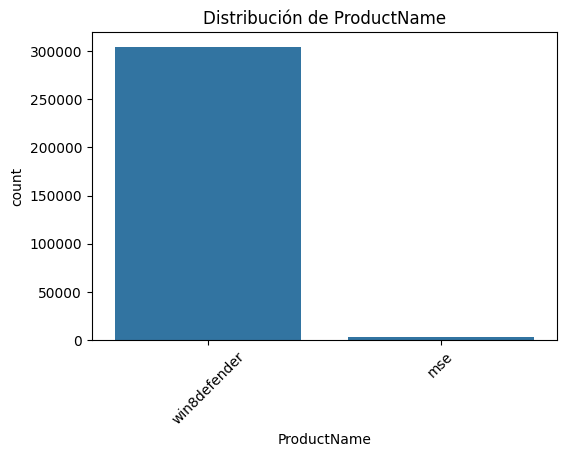

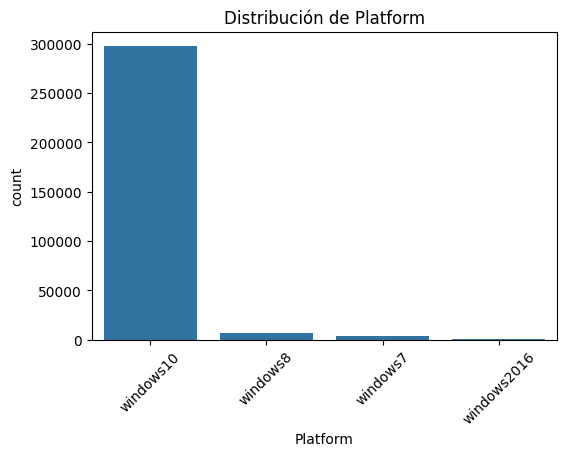

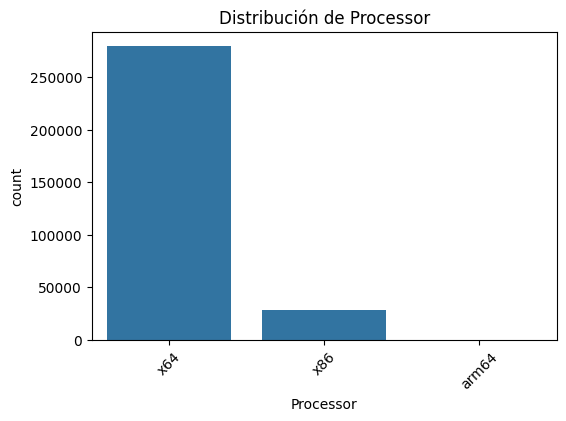

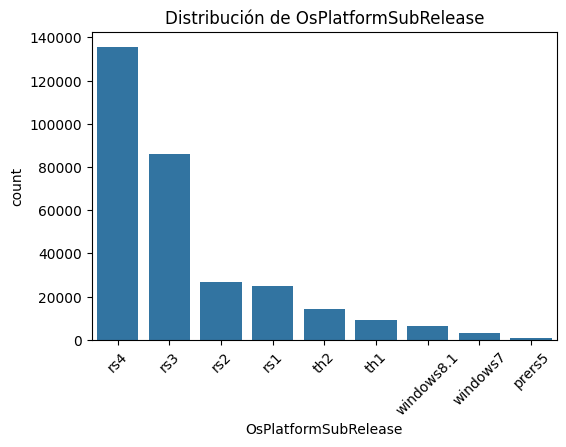

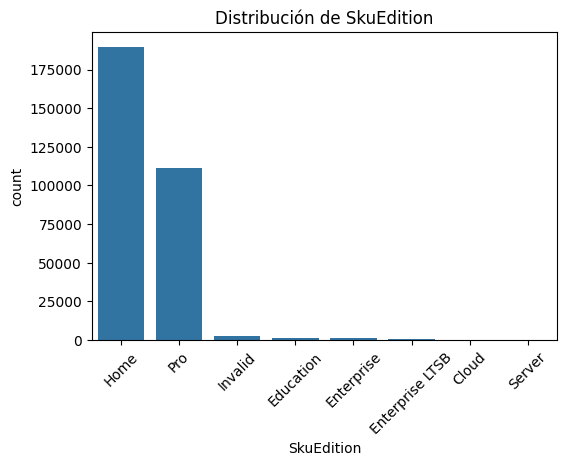

In [24]:
# variable categoricas

for col in categorias_menor_10[:5]:  # Solo algunas para empezar
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

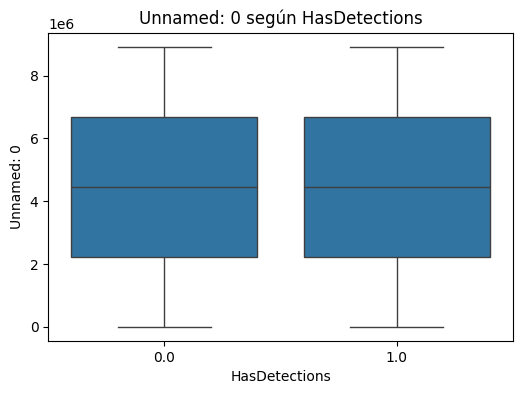

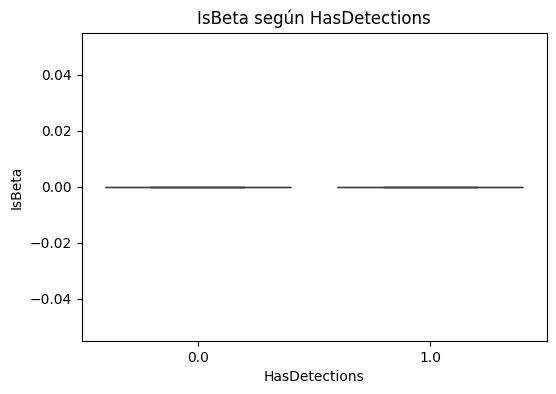

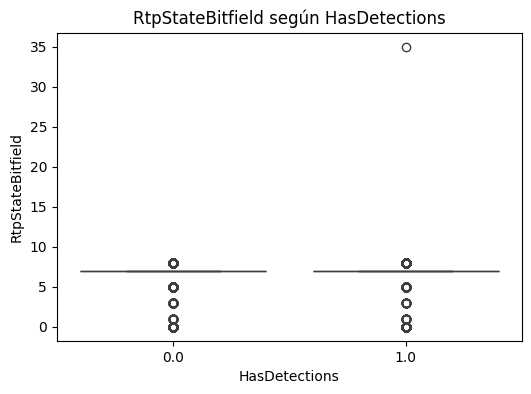

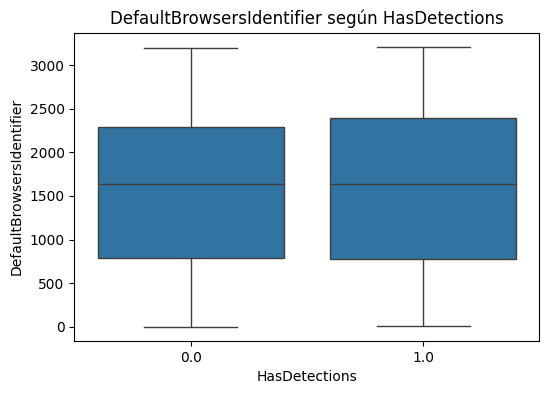

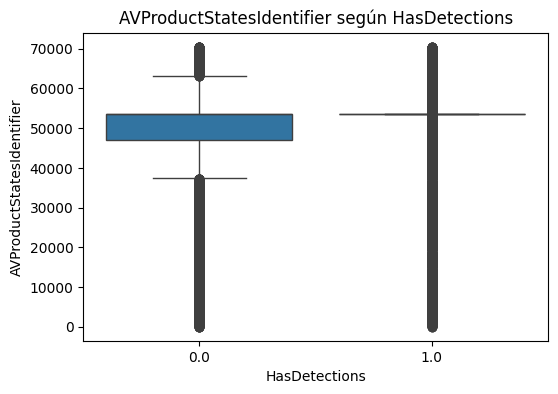

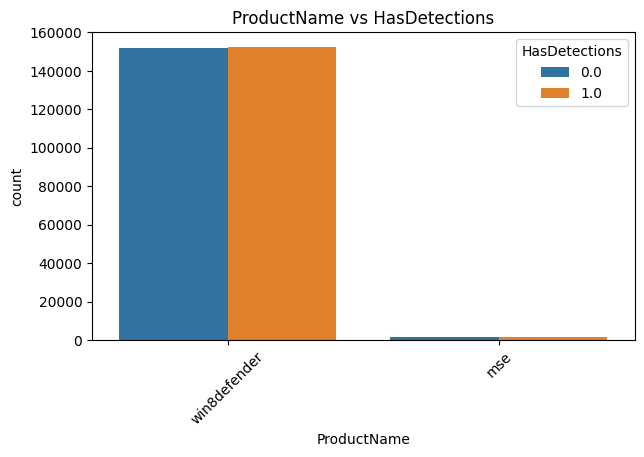

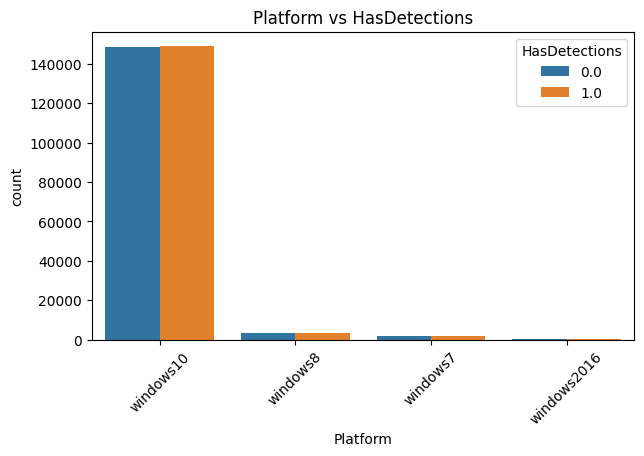

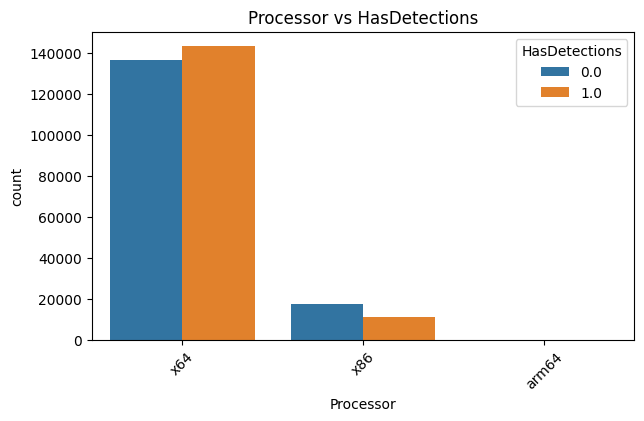

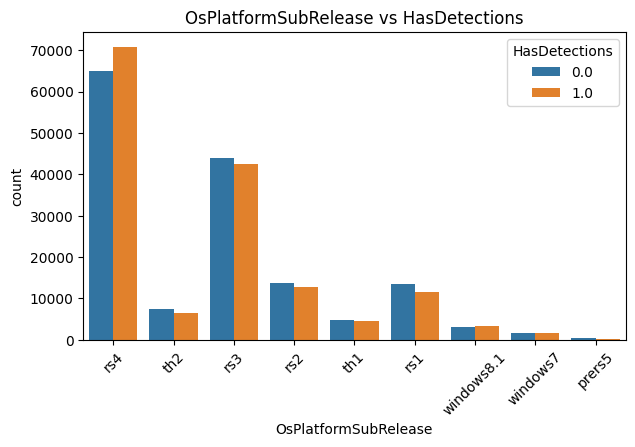

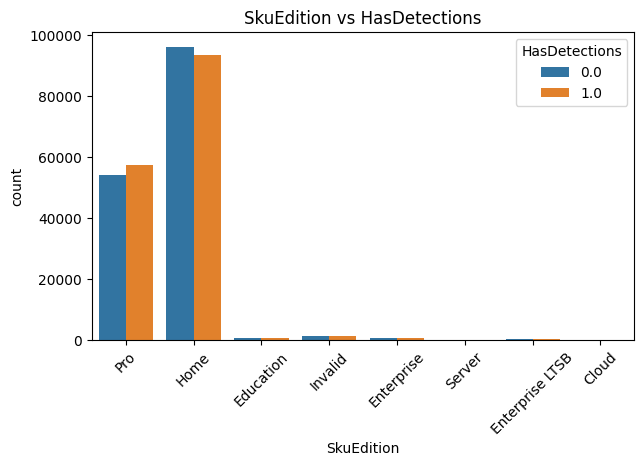

In [25]:
#Relación variable–target

#Numérica vs target (boxplots)
for col in lista_numericas[:5]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='HasDetections', y=df[col], data=df)
    plt.title(f"{col} según HasDetections")
    plt.show()

#Categórica vs target (countplot segmentado)
for col in categorias_menor_10[:5]:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue="HasDetections")
    plt.title(f"{col} vs HasDetections")
    plt.xticks(rotation=45)
    plt.show()

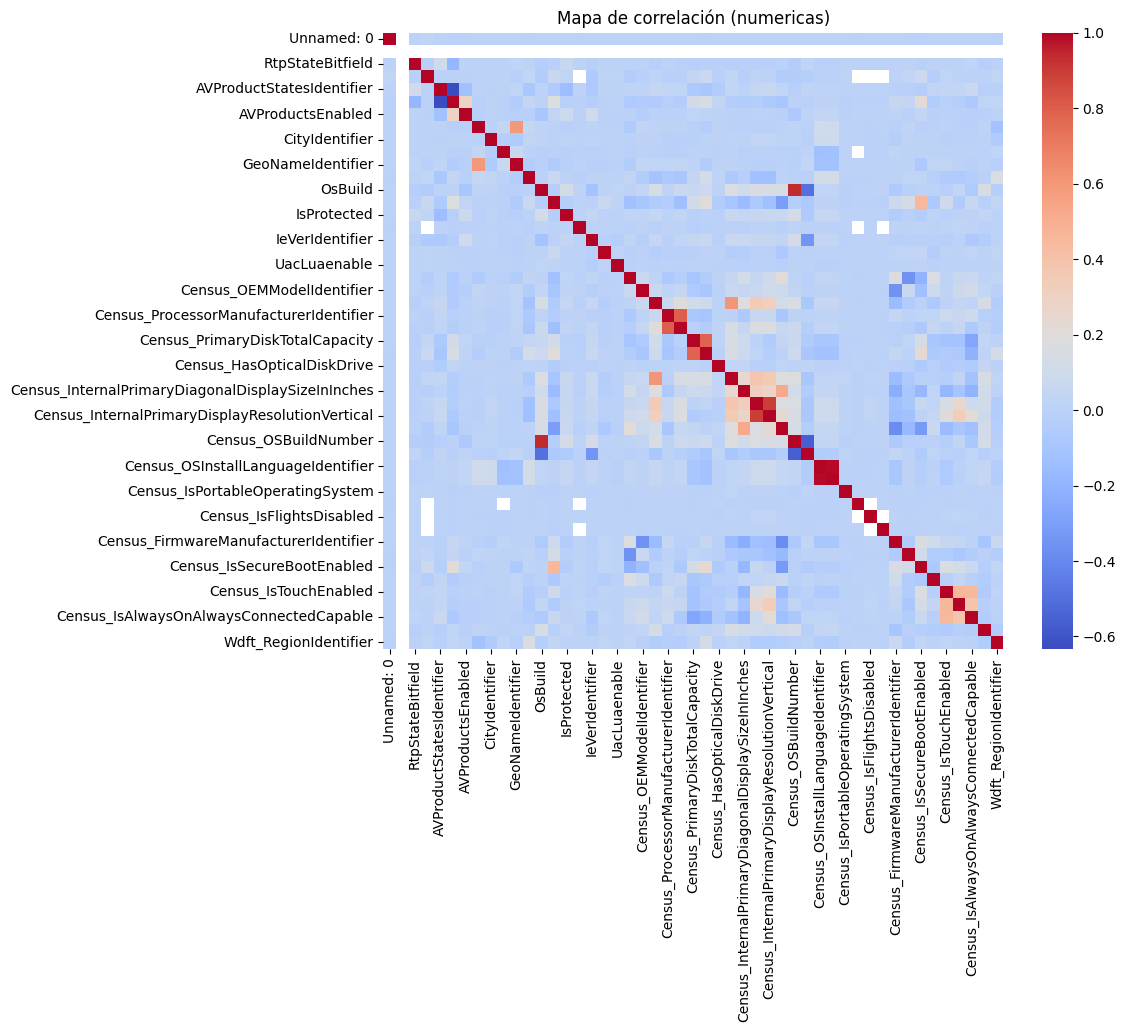

In [26]:
#corr entre variable numericas
plt.figure(figsize=(10,8))
sns.heatmap(df[lista_numericas].corr(), annot=False, cmap='coolwarm')
plt.title("Mapa de correlación (numericas)")
plt.show()

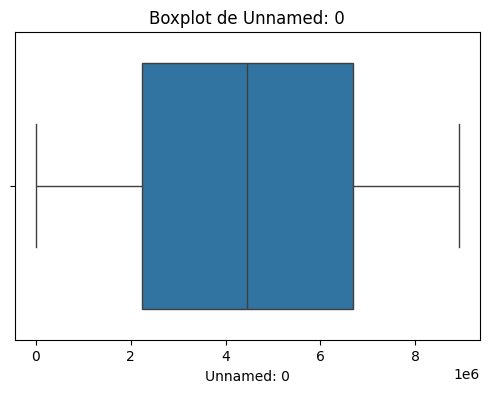

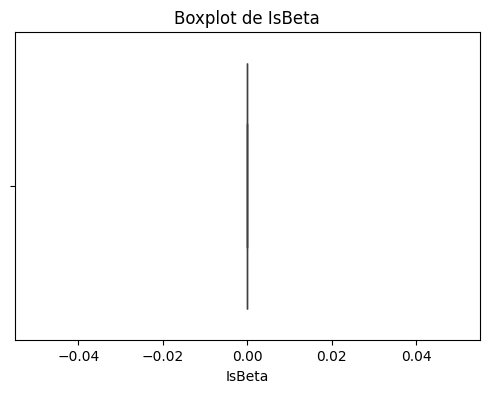

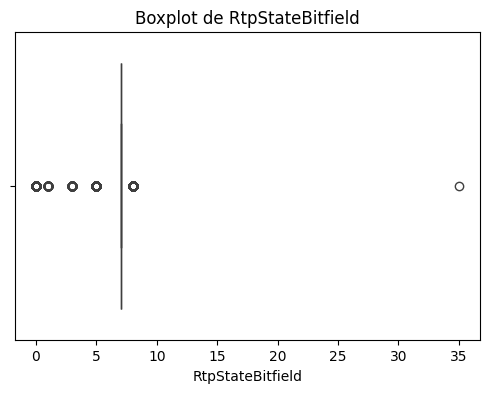

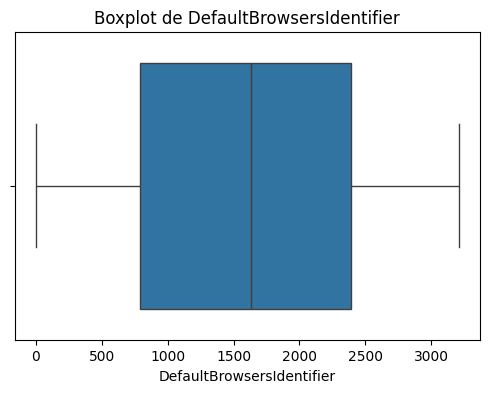

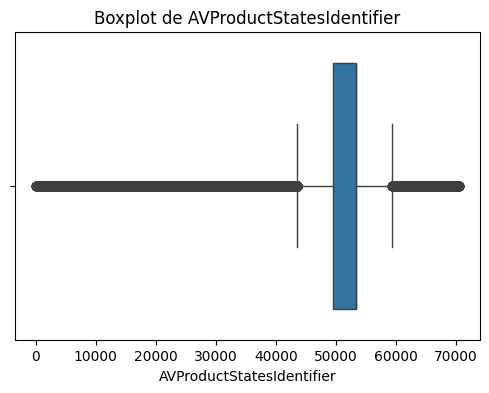

In [27]:
#Outliers con Boxplots
for col in lista_numericas[:5]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


Target

In [28]:
target = ["HasDetections"]

In [29]:
df['HasDetections'].info()

print(df["HasDetections"].dtype)
print(df["HasDetections"].isna().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 307712 entries, 0 to 307711
Series name: HasDetections
Non-Null Count   Dtype  
--------------   -----  
307711 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB
float64
1


In [30]:
df["HasDetections"].isnull().sum()
# Identificar si tengo null en el target

np.int64(1)

NULO

Columnas con más de 80% nulos:
['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass', 'Census_IsFlightingInternal']
Columnas eliminadas: 4
Nuevo shape: (307712, 80)

Porcentaje de nulos después de imputar:
HasDetections                0.000003
Unnamed: 0                   0.000000
ProductName                  0.000000
MachineIdentifier            0.000000
AppVersion                   0.000000
AvSigVersion                 0.000000
IsBeta                       0.000000
EngineVersion                0.000000
IsSxsPassiveMode             0.000000
AVProductStatesIdentifier    0.000000
dtype: float64


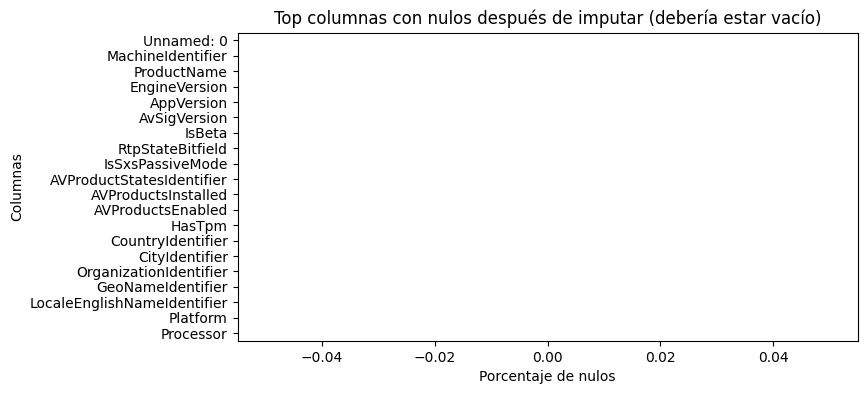

In [32]:
# 1️⃣ Calcular porcentaje de nulos
null_pct = df.isnull().mean()
print("Columnas con más de 80% nulos:")
cols_muchos_nulos = null_pct[null_pct > 0.8].index.tolist()
print(cols_muchos_nulos)

# 2️⃣ Eliminar columnas con más de 80% de nulos
df = df.drop(columns=cols_muchos_nulos)
print(f"Columnas eliminadas: {len(cols_muchos_nulos)}")
print(f"Nuevo shape: {df.shape}")

# 3️⃣ Volvemos a obtener las listas de variables actualizadas
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df, target)

# 4️⃣ Imputación de nulos más estratégica
# Numéricas → media o mediana
# Booleanas → moda
# Categóricas → "Desconocido"

# Función auxiliar segura
def imputar_valores(df):
    df_copy = df.copy()
    for col in df_copy.columns:
        if df_copy[col].isnull().sum() > 0:
            if col in lista_numericas:
                # usar mediana para robustez
                df_copy[col] = df_copy[col].fillna(df_copy[col].median())
            elif col in lista_boolean:
                df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])
            elif col in lista_categoricas:
                df_copy[col] = df_copy[col].fillna("Desconocido")
    return df_copy

df = imputar_valores(df)

# 5️⃣ Validamos imputación
print("\nPorcentaje de nulos después de imputar:")
print(df.isnull().mean().sort_values(ascending=False).head(10))

# 6️⃣ Visualización rápida del efecto
plt.figure(figsize=(8,4))
sns.barplot(x=df.isnull().mean().values[:20], y=df.isnull().mean().index[:20])
plt.title("Top columnas con nulos después de imputar (debería estar vacío)")
plt.xlabel("Porcentaje de nulos")
plt.ylabel("Columnas")
plt.show()


ENCONDING

Menos de 10 categorías → OneHot
Más de 10 categorías → Target Encoding o Frequency Encoding (mejor que LabelEncoder)

Categóricas con ≤10 categorías (OneHot): 14
Categóricas con >10 categorías (Frequency Encoding): 14
Shape final del dataset tras encoding: (307712, 138)


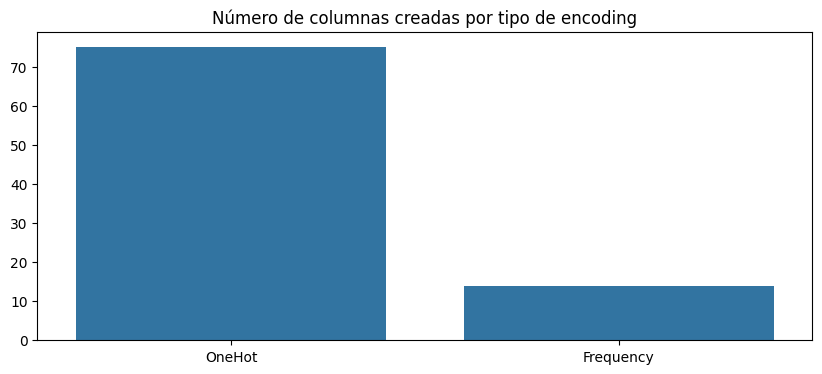

In [33]:
from sklearn.preprocessing import OneHotEncoder

# 1️⃣ Separar categóricas según número de categorías
categorias_mayor_10 = [col for col in lista_categoricas if df[col].nunique() > 10]
categorias_menor_10 = [col for col in lista_categoricas if df[col].nunique() <= 10]

print(f"Categóricas con ≤10 categorías (OneHot): {len(categorias_menor_10)}")
print(f"Categóricas con >10 categorías (Frequency Encoding): {len(categorias_mayor_10)}")

# 2️⃣ FREQUENCY ENCODING
def frequency_encoding(df, cols):
    df_encoded = df.copy()
    for col in cols:
        freqs = df_encoded[col].value_counts(normalize=True)
        df_encoded[col + "_freq"] = df_encoded[col].map(freqs)
    df_encoded = df_encoded.drop(columns=cols)
    return df_encoded

df = frequency_encoding(df, categorias_mayor_10)

# 3️⃣ ONE-HOT ENCODING
# Usamos get_dummies (eficiente y legible)
df = pd.get_dummies(df, columns=categorias_menor_10, drop_first=True)

# 4️⃣ Comprobamos resultado
print(f"Shape final del dataset tras encoding: {df.shape}")

# 5️⃣ Visualización rápida de nuevas columnas creadas
plt.figure(figsize=(10,4))
sns.barplot(
    x=['OneHot', 'Frequency'],
    y=[len([c for c in df.columns if "_freq" not in c and any(o in c for o in categorias_menor_10)]),
       len([c for c in df.columns if "_freq" in c])]
)
plt.title("Número de columnas creadas por tipo de encoding")
plt.show()


Selección y reducción de variables

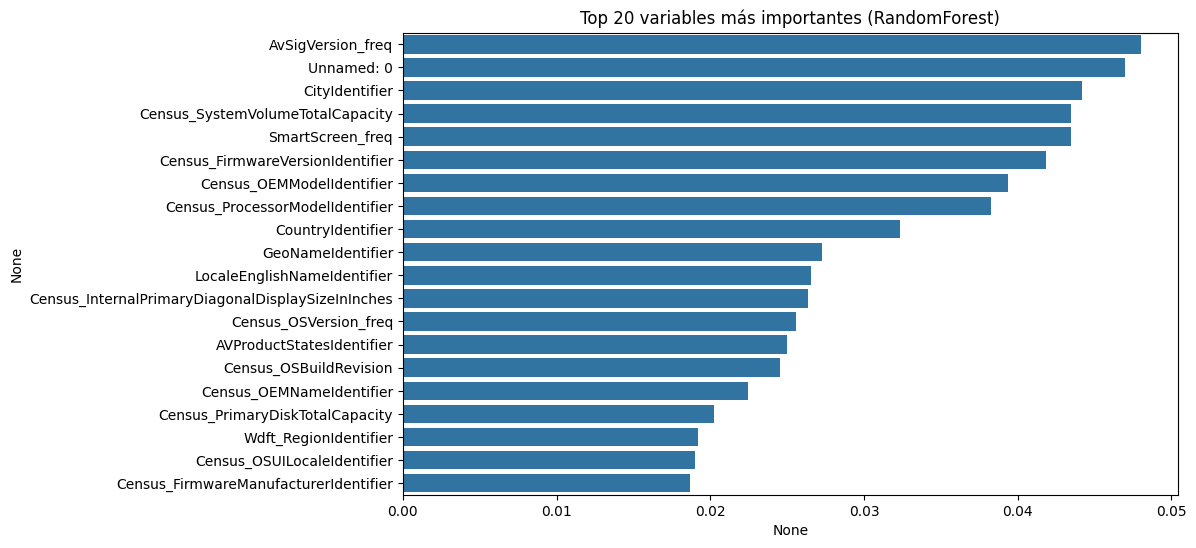

Número de variables seleccionadas: 30
Top features: ['AvSigVersion_freq', 'Unnamed: 0', 'CityIdentifier', 'Census_SystemVolumeTotalCapacity', 'SmartScreen_freq', 'Census_FirmwareVersionIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorModelIdentifier', 'CountryIdentifier', 'GeoNameIdentifier']


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

# Drop rows with nulls in the target column
df.dropna(subset=target, inplace=True)

# Dividimos en X, y
X = df.drop(columns=target)
y = df[target].squeeze()  # target como Serie

# Escalamos solo si hay variables numéricas puras
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Método 1: RandomForest Feature Importances
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_temp.fit(X_scaled, y)

importancias = pd.Series(rf_temp.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualización de las 20 variables más importantes
plt.figure(figsize=(10,6))
sns.barplot(x=importancias.head(20), y=importancias.head(20).index)
plt.title("Top 20 variables más importantes (RandomForest)")
plt.show()

# Seleccionamos top variables (por ejemplo top 30)
top_vars = importancias.head(30).index.tolist()
X_reducido = X_scaled[top_vars]

print(f"Número de variables seleccionadas: {len(top_vars)}")
print("Top features:", top_vars[:10])

Feature

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use the same reduced dataset from feature importance step:
rfe_selector = RFE(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    n_features_to_select=20
)
rfe_selector.fit(X_reducido, y)

selected_features = X_reducido.columns[rfe_selector.support_]
print("✅ Features selected by RFE:")
print(selected_features)

# Keep only the selected features for modeling
X_final = X_reducido[selected_features]

# (Optional) visualize feature ranking
ranking = pd.Series(rfe_selector.ranking_, index=X_reducido.columns).sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=ranking.head(20).values, y=ranking.head(20).index)
plt.title("Ranking de variables según RFE")
plt.show()


Modelos y comparativa


🔹 Modelo: Decision Tree
Accuracy: 0.6166
              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59     46084
         1.0       0.60      0.68      0.64     46230

    accuracy                           0.62     92314
   macro avg       0.62      0.62      0.61     92314
weighted avg       0.62      0.62      0.61     92314


🔹 Modelo: Random Forest
Accuracy: 0.6260
              precision    recall  f1-score   support

         0.0       0.64      0.57      0.61     46084
         1.0       0.61      0.68      0.64     46230

    accuracy                           0.63     92314
   macro avg       0.63      0.63      0.62     92314
weighted avg       0.63      0.63      0.63     92314


🔹 Modelo: Gradient Boosting
Accuracy: 0.6321
              precision    recall  f1-score   support

         0.0       0.64      0.61      0.63     46084
         1.0       0.63      0.65      0.64     46230

    accuracy                           0.63     9231

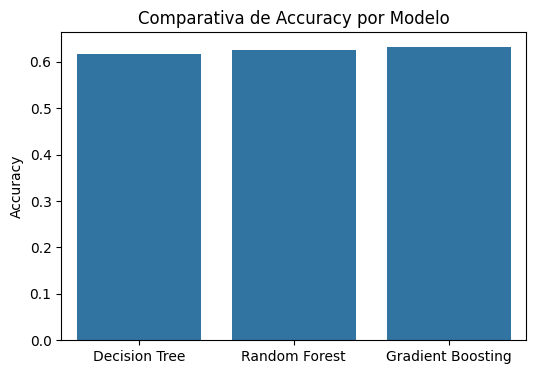

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# 1️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_reducido, y, test_size=0.3, random_state=42, stratify=y
)

# 2️⃣ Entrenamos modelos base
modelos = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, max_depth=3)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc
    print(f"\n🔹 Modelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# 3️⃣ Comparativa visual
plt.figure(figsize=(6,4))
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()))
plt.title("Comparativa de Accuracy por Modelo")
plt.ylabel("Accuracy")
plt.show()
